In [7]:
!rm Data/*
!pip3 install wget
from importlib.resources import path
import numpy as np 
import matplotlib.pyplot as plt
import os.path as path
import wget

zsh:1: no matches found: Data/*
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3.9 -m pip install --upgrade pip' command.


In [8]:
url="https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/EnergiaPotencialGas2D.txt"
file="../Data/Tiempolibre.txt"

In [9]:
def reader(url, file):
    if not path.exists(file):
        Path_ = wget.download(url, file)
    else:
        Path_ = file
    
    df=np.loadtxt(Path_)
    return df

In [10]:
df = reader(url, file)

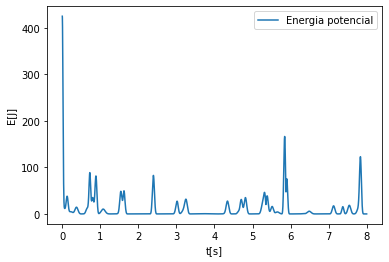

In [11]:
plt.plot(df[:,0],df[:,1],label="Energia potencial")
plt.xlabel("t[s]")
plt.ylabel("E[J]")
plt.legend()

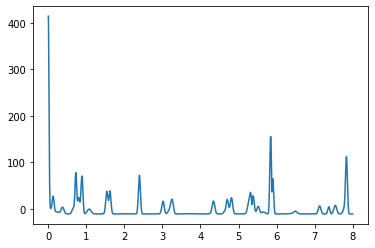

In [12]:
meanE=np.mean(df[:,1])

Energia=df[:,1]-meanE

t=df[:,0]

plt.plot(t,Energia)

In [13]:
N= len(Energia)

fft=np.fft.fft(Energia)

Freq=np.fft.fftfreq(N,1)

ffta=np.abs(fft)

mask1=Freq<0

FFTA=ffta.copy()

FFTA[mask1]=0

In [24]:
i=np.argmax(FFTA)
f0=Freq[i]
T=1/f0

In [25]:
izquierda=np.abs(Freq) > f0

derecha=np.abs(Freq) < f0

fft[izquierda]=0

fft[derecha]=0

Ffundamental=np.fft.ifft(fft)

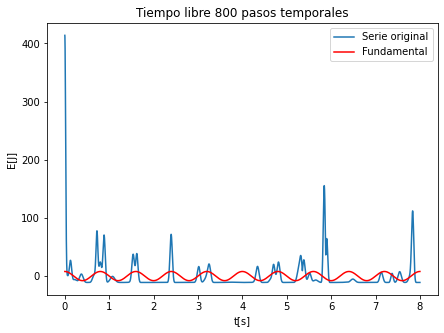

In [16]:
fig = plt.figure(figsize=(7,5))
plt.title("Tiempo libre 800 pasos temporales")

plt.plot(t,Energia, label = "Serie original")

plt.plot(t,np.real(Ffundamental), color = "red" , label = "Fundamental")

plt.xlabel("t[s]")
plt.ylabel("E[J]")
plt.legend()